# Processando dataset para os modelos de Machine Learning

Esse notebook é uma continuação do notebook "PreProcessingData.ipynb".
Além disso, esse notebook cria os dois datasets finais que são usados diretamente nos modelos de ML.
Ou seja, ao final da execução desse algoritmo dois datasets estarão prontos para ser usados em modelos de ML. </ br>

O principal objetivo desse notebook é transformar o dataset original em formato CATEGORICO para NUMÉRICO.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

In [2]:
# df = pd.read_csv('./DataSteps/STEP_6_Final_Dataset.csv', delimiter='\t')
df = pd.read_csv('./data/DataSteps/STEP_6_Final_Dataset.csv', delimiter='\t')

In [3]:
df

,ID,DTHR_REGISTRO,PORTA_ENTRADA,DATA_INICIO_SINTOMAS,HISTORICO_VIAGEM,PAIS_VISITADO,CIDADES_VISITADAS,DATA_RETORNO,COLETOU_AMOSTRA,LOCAL_COLETA,DATA_COLETA,PCR_INFLUENZA,IFI_OUTRO_VIRUS,PCR_COVID_19,STATUS_COVID,STATUS_COVID_ORDEM,DESFECHO,CD_ATENDIMENTO,DS_TP_ATENDIMENTO,CD_PACIENTE,GENERO,IDADE,SN_OBITO,DIAGNOSTICO_SARS,OBITO_SARS,TIPO_SAIDA,TIPO_OBITO,DTHR_ALTA,CD_CID,DS_ESPECIALID_SAI,REINTER_30D,CARATER_ATENDIMENTO,EMERG_SERVICO,EMERG_RISCO,CID_DIAG_ATEND,CID_CAPITULO_DIAG,BLOCO_CENTRAL_ST,HEMODINAMICA_ST,EX_LAB_ST,EX_IMG_ST,EX_OUTROS_ST,CD_PACIENTE_FROM_ESTUDO,COMPETENCIA,PORTA_ENTRADA_FROM_ESTUDO,DATA_INICIO_SINTOMAS_FROM_ESTUDO,HISTORICO_VIAGEM_FROM_ESTUDO,CIDADES_VISITADAS_FROM_ESTUDO,LOCAL_COLETA_FROM_ESTUDO,DATA_COLETA_FROM_ESTUDO,PCR_COVID_19_FROM_ESTUDO,DESFECHO_FROM_ESTUDO,TIPO_REGISTRO,SN_IFI_OV_SINCICIAL_RESP,SN_IFI_OV_PARAINFLU3,SN_IFI_OV_PARAINFLU2,SN_IFI_OV_PARAINFLU1,SN_IFI_OV_INFLUA,SN_IFI_OV_INFLUB,SN_IFI_OV_ADENOVIRUS,SN_CRIT_CONTATO_CASO_COVID,SN_CRIT_CONTATO_CASO_SUSPEITO,SN_CRIT_PROF_SAUDE_HOSPITAL,SN_CRIT_PROF_SAUDE_OUT,SN_CRIT_SRAG,SN_CRIT_SINDROME_GRIPAL,SN_CRIT_IGNORADO,SN_CRIT_OUTROS,SN_CRIT_PROT_COVID19,ESTUDO_TP_EXPOSICAO,ESTUDO_COMORB_PREV_HAS,ESTUDO_COMORB_PREV_IAM,ESTUDO_COMORB_PREV_IC,ESTUDO_COMORB_PREV_DRC,ESTUDO_COMORB_PREV_DMI,ESTUDO_COMORB_PREV_DMII,ESTUDO_COMORB_PREV_CARCINOMA,ESTUDO_COMORB_PREV_ADENOMA,ESTUDO_COMORB_PREV_LINFOMA,ESTUDO_COMORB_PREV_AVC,ESTUDO_COMORB_PREV_ASMA,ESTUDO_COMORB_PREV_DPOC,ESTUDO_COMORB_PREV_OBESIDADE,ESTUDO_COMORB_PREV_EPILEPSIA,ESTUDO_COMORB_PREV_HIGIDO,ESTUDO_COMORB_PREV_OUTRAS,ESTUDO_CHARLSON,ESTUDO_FR_DIA_COLETA,ESTUDO_FC_DIA_COLETA,ESTUDO_PA_DIA_COLETA,ESTUDO_TEMPERATURA_DIA_COLETA,ESTUDO_SATURACAO_DIA_COLETA,ESTUDO_APACHE2,ESTUDO_RISCO,ESTUDO_TRATAMENTO,ESTUDO_COMORB_PREV_TX_ORG_SOL,ESTUDO_CONDUTA,ESTUDO_LOCAL_CONTAMINACAO,ESTUDO_LOCAL_CONTAM_UI,ESTUDO_DT_DESFECHO,ESTUDO_COMORB_PREV_DESCON,ESTUDO_COMORB_PREV_DVP,ESTUDO_COMORB_PREV_DEMENCIA,ESTUDO_COMORB_PREV_DTC,ESTUDO_COMORB_PREV_UP,ESTUDO_COMORB_PREV_DFL,ESTUDO_COMORB_PREV_DFM,ESTUDO_COMORB_PREV_HEMIPLEGIA,ESTUDO_COMORB_PREV_LEUCEMIA,ESTUDO_COMORB_PREV_HIV,ESTUDO_COMORB_PREV_TUL,ESTUDO_COMORB_PREV_TUM,DIAS_CORRIDOS,STATUS_COVID.1,CD_ATENDIMENTO.1,CD_PACIENTE_FROM_UTI,CD_LEITO,CD_UNIDADE,DS_UNIDADE,DT_ENTRADA,HR_ENTRADA,DT_SAIDA,HR_SAIDA,DTHR_UTI_IN,DTHR_UTI_OUT,SEGUNDOS_NA_UTI,DIAS_NA_UTI
0,25958,07/03/2021 17:29:00,NaN,NaN,NaN,NaN,NaN,NaN,SIM,PRONTOPUC ADULTO/INTE,07/03/2021 17:33:56,NaN,NaN,POSITIVO,CONFIRMADOS,1,NÃO INFORMADO,1584431.0,INTERNADO,1597032.0,MASCULINO,"60,8381278538813",N,NÃO,NÃO,ALTA,NaN,12/03/2021 16:13:56,I64,NEUROLOGIA,NÃO,ELETIVO,NÃO INFORMADO,NÃO INFORMADO,I64,Aparelho circulatório,NÃO,NÃO,SIM,SIM,SIM,1597032.0,07/03/2021,NaN,NaN,NaN,NaN,PRONTOPUC ADULTO/INTE,07/03/2021 17:33:56,POSITIVO,INTERNAÇÃO,A,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
1,25917,06/03/2021 08:22:00,NaN,NaN,NaN,NaN,NaN,NaN,SIM,PRONTOPUC ADULTO/INTE,06/03/2021 09:11:54,NaN,NaN,POSITIVO,CONFIRMADOS,1,NÃO INFORMADO,1584037.0,INTERNADO,1651281.0,FEMININO,"74,1093607305936",S,SIM,SIM,ÓBITO,NaN,19/03/2021 11:33:20,B342,CLINICA MEDICA,NÃO,URGÊNCIA,PRONTOSUS,LARANJA,B342,Infecciosas e parasitárias,NÃO,NÃO,SIM,SIM,NÃO,1651281.0,06/03/2021,NaN,NaN,NaN,NaN,PRONTOPUC ADULTO/INTE,06/03/2021 09:11:54,POSITIVO,INTERNAÇÃO,A,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,13,CONFIRMADOS,1584037.0,1651281.0,1674.0,6.0,UTI,12/03/2021,15:56:05,19/03/2021,11:33:20,12/03/2021 15:56:05,19/03/2021 11:33:20,589035.0,6.817535
2,26270,12/03/2021 17:44:00,NaN,NaN,NaN,NaN,NaN,NaN,SIM,PRONTOPUC ADULTO,12/03/2021 17:47:00,NaN,NaN,POSITIVO,CONFIRMADOS,1,NÃO INFORMADO,1591014.0,INTERNADO,1688648.0,FEMININO,"72,4682648401826",N,NÃO,NÃO,ALTA,NaN,27/03/2021 10:55:29,F430,PNEUMOLO

O bloco abaixo exclui colunas que não são necessárias para o aprendizado dos modelos:

In [4]:
def showMissing(data):
    for column in data.columns:
        missingC = data[column].isnull().sum()
        print(column,',',missingC,',')
        
def showValues(data):
    for column in data.columns:
        values = data[column].value_counts()
        print(column,',',values,',')

In [5]:
showMissing(df)

ID , 0 ,
DTHR_REGISTRO , 0 ,
PORTA_ENTRADA , 1309 ,
DATA_INICIO_SINTOMAS , 1309 ,
HISTORICO_VIAGEM , 1322 ,
PAIS_VISITADO , 1328 ,
CIDADES_VISITADAS , 1328 ,
DATA_RETORNO , 1328 ,
COLETOU_AMOSTRA , 0 ,
LOCAL_COLETA , 1 ,
DATA_COLETA , 6 ,
PCR_INFLUENZA , 1324 ,
IFI_OUTRO_VIRUS , 1322 ,
PCR_COVID_19 , 0 ,
STATUS_COVID , 0 ,
STATUS_COVID_ORDEM , 0 ,
DESFECHO , 0 ,
CD_ATENDIMENTO , 0 ,
DS_TP_ATENDIMENTO , 0 ,
CD_PACIENTE , 0 ,
GENERO , 0 ,
IDADE , 0 ,
SN_OBITO , 0 ,
DIAGNOSTICO_SARS , 0 ,
OBITO_SARS , 0 ,
TIPO_SAIDA , 0 ,
TIPO_OBITO , 1315 ,
DTHR_ALTA , 0 ,
CD_CID , 0 ,
DS_ESPECIALID_SAI , 0 ,
REINTER_30D , 0 ,
CARATER_ATENDIMENTO , 0 ,
EMERG_SERVICO , 0 ,
EMERG_RISCO , 0 ,
CID_DIAG_ATEND , 0 ,
CID_CAPITULO_DIAG , 0 ,
BLOCO_CENTRAL_ST , 0 ,
HEMODINAMICA_ST , 0 ,
EX_LAB_ST , 0 ,
EX_IMG_ST , 0 ,
EX_OUTROS_ST , 0 ,
CD_PACIENTE_FROM_ESTUDO , 5 ,
COMPETENCIA , 5 ,
PORTA_ENTRADA_FROM_ESTUDO , 1297 ,
DATA_INICIO_SINTOMAS_FROM_ESTUDO , 1166 ,
HISTORICO_VIAGEM_FROM_ESTUDO , 1316 ,
CIDADES_VISITADA

In [6]:
data = df.drop([
    'ID',
    'DTHR_REGISTRO',
    'SN_OBITO',
    'DATA_INICIO_SINTOMAS',
    'PAIS_VISITADO',
    'CIDADES_VISITADAS',
    'CD_ATENDIMENTO',
    'DATA_RETORNO',
    'DATA_COLETA',
    'DTHR_ALTA',
    'COMPETENCIA',
    'CD_PACIENTE_FROM_ESTUDO',
    'PORTA_ENTRADA_FROM_ESTUDO',
    'DATA_INICIO_SINTOMAS_FROM_ESTUDO',
    'HISTORICO_VIAGEM_FROM_ESTUDO',
    'CIDADES_VISITADAS_FROM_ESTUDO',
    'LOCAL_COLETA_FROM_ESTUDO',
    'DATA_COLETA_FROM_ESTUDO',
    'PCR_COVID_19_FROM_ESTUDO',
    'DESFECHO_FROM_ESTUDO',
    'CD_PACIENTE_FROM_UTI',
    'DT_ENTRADA',
    'HR_ENTRADA',
    'DT_SAIDA',
    'HR_SAIDA',
    'SEGUNDOS_NA_UTI',
    'STATUS_COVID_ORDEM',
    'PCR_COVID_19',
    'STATUS_COVID',
    'PORTA_ENTRADA',
    'HISTORICO_VIAGEM',
    'DS_TP_ATENDIMENTO',
    'OBITO_SARS',
    'TIPO_SAIDA',
    'TIPO_OBITO',
    'SN_CRIT_CONTATO_CASO_SUSPEITO',
    'SN_CRIT_PROF_SAUDE_HOSPITAL',
    'SN_CRIT_PROF_SAUDE_OUT',
    'SN_CRIT_IGNORADO',
    'SN_CRIT_PROT_COVID19',
    'CD_UNIDADE',
    'CD_LEITO',
    'DS_UNIDADE'], axis=1)

In [7]:
data['CD_PACIENTE']

0       1597032.0
1       1651281.0
2       1688648.0
3       1725344.0
4       1766519.0
          ...    
1323    2387683.0
1324    2234420.0
1325    1936797.0
1326    2385774.0
1327    2387419.0
Name: CD_PACIENTE, Length: 1328, dtype: float64

## Calculadora do Charlson

In [8]:
def resume(coluna, df):
    missingC = df[coluna].isnull().sum()
    print("Valores Faltantes: ", missingC)
    print(df[coluna].value_counts())
    ndf = df[~df[coluna].isna()].copy()
    lista = ndf[coluna].unique().tolist()
    print(coluna+": ", lista)
    return missingC

def pre_dataset(df):
    df = df[df['ESTUDO_CHARLSON'].isna()]
    columns_list = df.columns.to_list()
    list_comorb = []
    for i in columns_list:
        if i.startswith('ESTUDO_COMORB_PREV_'):
            list_comorb.append(i)

    df_cii = df[["CD_PACIENTE", "IDADE", *list_comorb]]
    df_cii = df_cii.rename(columns=str.lower)
    df_cii.idade = df_cii.idade.str.split(',').str[0].astype(int)
    return df_cii

def score_charlson(df_cii):
    columns_cii = ['estudo_comorb_prev_iam', 'estudo_comorb_prev_ic', 'estudo_comorb_prev_drc',
               'estudo_comorb_prev_dmii', 'estudo_comorb_prev_carcinoma',
               'estudo_comorb_prev_avc', 'estudo_comorb_prev_dpoc', 'estudo_comorb_prev_demencia', 
               'estudo_comorb_prev_leucemia', 'estudo_comorb_prev_hiv']

    score = {'estudo_comorb_prev_iam': 1, 'estudo_comorb_prev_ic': 1, 'estudo_comorb_prev_drc': 2, 'estudo_comorb_prev_dmi': 1,
             'estudo_comorb_prev_dmii': 2, 'estudo_comorb_prev_carcinoma': 6, 'estudo_comorb_prev_adenoma': 2,
             'estudo_comorb_prev_linfoma': 2, 'estudo_comorb_prev_avc': 1, 'estudo_comorb_prev_dpoc': 1,
             'estudo_comorb_prev_demencia': 1, 'estudo_comorb_prev_dtc': 1, 'estudo_comorb_prev_hemiplegia': 2,
             'estudo_comorb_prev_leucemia': 2, 'estudo_comorb_prev_hiv': 6}

    df_ciiF = df_cii[["cd_paciente", "idade", *columns_cii]]
    
    df_ciiF['estudo_comorb_prev_iam'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_ic'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_drc'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_dmii'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_carcinoma'].replace({"N": 0, "S": 6}, inplace=True)
    df_ciiF['estudo_comorb_prev_avc'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_dpoc'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_demencia'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_leucemia'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_hiv'].replace({"N": 0, "S": 6}, inplace=True)
    
    search = ' // ' or ','
    df_ciiF['count_outras']= df_cii['estudo_comorb_prev_outras'].astype(str).str.count('//|,')
    
    idade_cii = []    

    for idade in df_ciiF.idade:
        if (idade >= 80):
            idade_cii.append(4)
        elif (idade >= 70 and idade <=79):
            idade_cii.append(3)
        elif (idade >= 60 and idade <=69):
            idade_cii.append(2) 
        elif (idade >= 50 and idade <=59):
            idade_cii.append(1)
        else:
            idade_cii.append(0)

    df_ciiF['idade'] = idade_cii
        
    charlson = df_ciiF[['count_outras','idade', *columns_cii]].sum(axis = 1, skipna = True) 
    print(charlson)
    
    df_final = pd.DataFrame(charlson, columns=['estudo_charlson'])

    df_final = df_final.assign(cd_paciente = df_ciiF['cd_paciente'])
#    df_final = df_final.assign(idade = df_cii['idade'])
    
    return df_final

In [9]:
pre_processing_data = pre_dataset(data)
pre_processing_data.columns

Index(['cd_paciente', 'idade', 'estudo_comorb_prev_has',
       'estudo_comorb_prev_iam', 'estudo_comorb_prev_ic',
       'estudo_comorb_prev_drc', 'estudo_comorb_prev_dmi',
       'estudo_comorb_prev_dmii', 'estudo_comorb_prev_carcinoma',
       'estudo_comorb_prev_adenoma', 'estudo_comorb_prev_linfoma',
       'estudo_comorb_prev_avc', 'estudo_comorb_prev_asma',
       'estudo_comorb_prev_dpoc', 'estudo_comorb_prev_obesidade',
       'estudo_comorb_prev_epilepsia', 'estudo_comorb_prev_higido',
       'estudo_comorb_prev_outras', 'estudo_comorb_prev_tx_org_sol',
       'estudo_comorb_prev_descon', 'estudo_comorb_prev_dvp',
       'estudo_comorb_prev_demencia', 'estudo_comorb_prev_dtc',
       'estudo_comorb_prev_up', 'estudo_comorb_prev_dfl',
       'estudo_comorb_prev_dfm', 'estudo_comorb_prev_hemiplegia',
       'estudo_comorb_prev_leucemia', 'estudo_comorb_prev_hiv',
       'estudo_comorb_prev_tul', 'estudo_comorb_prev_tum'],
      dtype='object')

In [10]:
resume('ESTUDO_CHARLSON', df)

Valores Faltantes:  1185
5.0     33
4.0     24
2.0     19
6.0     17
3.0     16
1.0     10
7.0      8
10.0     6
8.0      6
0.0      2
9.0      2
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [2.0, 5.0, 1.0, 3.0, 6.0, 7.0, 4.0, 8.0, 9.0, 10.0, 0.0]


1185

In [11]:
charlson_complete = score_charlson(pre_processing_data)

0       2.0
1       3.0
2       3.0
3       0.0
4       0.0
       ... 
1323    4.0
1324    3.0
1325    0.0
1326    3.0
1327    2.0
Length: 1185, dtype: float64


/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [12]:
charlson_complete.head()

,estudo_charlson,cd_paciente
0,2.0,1597032.0
1,3.0,1651281.0
2,3.0,1688648.0
3,0.0,1725344.0
4,0.0,1766519.0


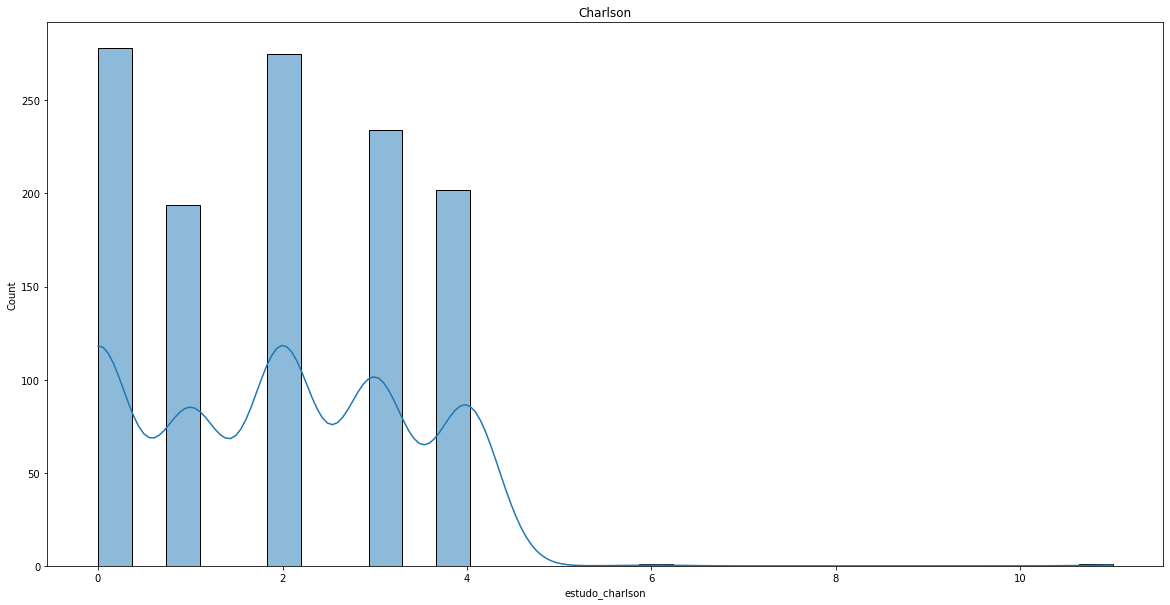

In [13]:
plt.figure(figsize=(20, 10))
sns.histplot(charlson_complete.estudo_charlson, kde=True)
plt.title("Charlson")
plt.show()

In [14]:
charlson_complete.estudo_charlson.value_counts()

0.0     278
2.0     275
3.0     234
4.0     202
1.0     194
6.0       1
11.0      1
Name: estudo_charlson, dtype: int64

## Análise de cada variável restante

In [15]:
def __getDictToReplace(keys):
    d = {}
    for k in keys:
        d[k] = keys.index(k) + 1
    return d

#### COLETOU_AMOSTRA

In [16]:
data['COLETOU_AMOSTRA'].value_counts()

SIM    1316
NAO      12
Name: COLETOU_AMOSTRA, dtype: int64

In [17]:
data['COLETOU_AMOSTRA'] = data['COLETOU_AMOSTRA'].replace({'SIM': 1, 'NAO': 0})

#### [REMOVED] LOCAL_COLETA

In [18]:
data['LOCAL_COLETA'].value_counts() #DROP

PRONTOPUC ADULTO/INTE                   484
PRONTOPUC ADULTO                        353
EMERGENCIA ADULTA SUS/INTE               93
EMERGENCIA ADULTA SUS                    75
8 S - INTERNACAO                         54
8 N - INTERNACAO                         31
SALA DE RECUPERACAO                      29
UTI-CORONARIANA                          28
7 S - INTERNACAO                         27
5 S - INTERNAÇÃO                         22
7 N - INTERNACAO                         19
UTI GERAL AREA II                        17
6 S - INTERNACAO                         15
COVID SUS - INTERNACAO                   11
UTI POS OPERATORIO CIRURGIA CARDIACA      8
9 N - INTERNACAO                          8
UTI-CIRURGICA                             7
9 S - INTERNACAO                          5
6 N - INTERNACAO                          5
PSIQUIATRIA - INTERNACAO                  4
HEMODINAMICA                              4
UTI GERAL AREA I                          4
UTI 3A COVID CONVENIOS ADULTO   

In [19]:
data = data.drop(['LOCAL_COLETA'], axis=1)

#### [REMOVED] PCR_INFLUENZA

In [20]:
data['PCR_INFLUENZA'].value_counts() #DROP

EM ANDAMENTO    4
Name: PCR_INFLUENZA, dtype: int64

In [21]:
data = data.drop(['PCR_INFLUENZA'], axis=1)

#### IFI_OUTRO_VIRUS

In [22]:
data['IFI_OUTRO_VIRUS'] = data['IFI_OUTRO_VIRUS'].fillna('NI')

In [23]:
data['IFI_OUTRO_VIRUS'].value_counts()

NI              1322
EM ANDAMENTO       4
NEGATIVO           2
Name: IFI_OUTRO_VIRUS, dtype: int64

In [24]:
data['IFI_OUTRO_VIRUS'] = data['IFI_OUTRO_VIRUS'].replace({'EM ANDAMENTO': 1, 'NEGATIVO': 0, 'NI': 2})

#### [REMOVED] DESFECHO

In [25]:
data['DESFECHO'].value_counts() #DROP

NÃO INFORMADO    1302
INTERNAÇÃO         26
Name: DESFECHO, dtype: int64

In [26]:
data = data.drop(['DESFECHO'], axis=1)

#### CD_PACIENTE

Essa feature permance no dataset, pois depois permite fazer buscas mais precisas.
Não é necessário fazer nenhum processamento nela.

#### GENERO

In [27]:
data['GENERO'].value_counts()

MASCULINO    676
FEMININO     652
Name: GENERO, dtype: int64

In [28]:
data['GENERO'] = data['GENERO'].replace({'MASCULINO': 1, 'FEMININO': 0})

#### IDADE

In [29]:
data['IDADE'].value_counts()

64,2052511415525    2
80,0299086757991    2
68,4627853881279    2
65,8326484018265    2
63,2682648401826    2
                   ..
67,1888127853881    1
76,7723744292237    1
51,3641552511416    1
80,325799086758     1
99,2299086757991    1
Name: IDADE, Length: 1293, dtype: int64

Essa feature já é numérica.

#### DIAGNOSTICO_SARS

In [30]:
data['DIAGNOSTICO_SARS'].value_counts()

NÃO    973
SIM    355
Name: DIAGNOSTICO_SARS, dtype: int64

In [31]:
data['DIAGNOSTICO_SARS'] = data['DIAGNOSTICO_SARS'].replace({'SIM': 1, 'NÃO': 0})

#### CD_CID

In [32]:
data['CD_CID'].value_counts()

B342    353
B349    236
A419     55
U071     23
I200     22
       ... 
I211      1
K593      1
D71       1
B207      1
I652      1
Name: CD_CID, Length: 328, dtype: int64

In [33]:
keys = data['CD_CID'].value_counts().keys().tolist()

In [34]:
dictToReplace = __getDictToReplace(keys)

In [35]:
dictToReplace

{'B342': 1,
 'B349': 2,
 'A419': 3,
 'U071': 4,
 'I200': 5,
 'I64': 6,
 'I500': 7,
 'K359': 8,
 'J180': 9,
 'N180': 10,
 'J960': 11,
 'I219': 12,
 'N179': 13,
 'J159': 14,
 'I743': 15,
 'N390': 16,
 'A499': 17,
 'R060': 18,
 'R100': 19,
 'J18': 20,
 'K921': 21,
 'J15': 22,
 'I639': 23,
 'J81': 24,
 'K810': 25,
 'I48': 26,
 'C61': 27,
 'J189': 28,
 'I269': 29,
 'N189': 30,
 'I509': 31,
 'K920': 32,
 'J129': 33,
 'C509': 34,
 'G409': 35,
 'C349': 36,
 'B338': 37,
 'I442': 38,
 'S828': 39,
 'G402': 40,
 'K850': 41,
 'B972': 42,
 'J90': 43,
 'K859': 44,
 'I21': 45,
 'N188': 46,
 'K57': 47,
 'I255': 48,
 'C679': 49,
 'S720': 50,
 'C189': 51,
 'J12': 52,
 'N200': 53,
 'I26': 54,
 'C348': 55,
 'I50': 56,
 'N17': 57,
 'M169': 58,
 'B340': 59,
 'G049': 60,
 'C187': 61,
 'A418': 62,
 'K562': 63,
 'I739': 64,
 'C188': 65,
 'B348': 66,
 'I710': 67,
 'J441': 68,
 'I210': 69,
 'D376': 70,
 'G959': 71,
 'C20': 72,
 'F609': 73,
 'B258': 74,
 'Z988': 75,
 'R074': 76,
 'C629': 77,
 'A488': 78,
 'J80': 7

In [36]:
data['CD_CID'] = data['CD_CID'].replace(dictToReplace)

#### DS_ESPECIALID_SAI

In [37]:
data['DS_ESPECIALID_SAI'].value_counts()

CLINICA MEDICA                    402
NEFROLOGIA                        182
PNEUMOLOGIA                       131
INFECTOLOGIA                      129
CARDIOLOGIA                       100
NEUROLOGIA                         75
MEDICINA INTENSIVA                 50
ONCOLOGIA CLINICA                  47
CIRURGIA GERAL                     34
ORTOPEDIA E TRAUMATOLOGIA          25
GERIATRIA                          25
UROLOGIA                           23
CIRURGIA DO APARELHO DIGESTIVO     22
GASTROENTEROLOGIA                  19
CIRURGIA CARDIOVASCULAR            15
PSIQUIATRIA                         7
COLOPROCTOLOGIA                     6
CIRURGIA TORACICA                   6
HEMATOLOGIA E HEMOTERAPIA           6
GINECOLOGIA E OBSTETRICIA           5
NEUROCIRURGIA                       4
OTORRINOLARINGOLOGIA                3
CIRURGIA ONCOLOGICA                 2
CIRURGIA VASCULAR                   2
MEDICINA DE EMERGENCIA              2
CIRURGIA DE CABEÇA E PESCOÇO        1
ENDOCRINOLOG

In [38]:
keys = data['DS_ESPECIALID_SAI'].value_counts().keys().tolist()

In [39]:
dictToReplace = __getDictToReplace(keys)

In [40]:
dictToReplace

{'CLINICA MEDICA': 1,
 'NEFROLOGIA': 2,
 'PNEUMOLOGIA': 3,
 'INFECTOLOGIA': 4,
 'CARDIOLOGIA': 5,
 'NEUROLOGIA': 6,
 'MEDICINA INTENSIVA': 7,
 'ONCOLOGIA CLINICA': 8,
 'CIRURGIA GERAL': 9,
 'ORTOPEDIA E TRAUMATOLOGIA': 10,
 'GERIATRIA': 11,
 'UROLOGIA': 12,
 'CIRURGIA DO APARELHO DIGESTIVO': 13,
 'GASTROENTEROLOGIA': 14,
 'CIRURGIA CARDIOVASCULAR': 15,
 'PSIQUIATRIA': 16,
 'COLOPROCTOLOGIA': 17,
 'CIRURGIA TORACICA': 18,
 'HEMATOLOGIA E HEMOTERAPIA': 19,
 'GINECOLOGIA E OBSTETRICIA': 20,
 'NEUROCIRURGIA': 21,
 'OTORRINOLARINGOLOGIA': 22,
 'CIRURGIA ONCOLOGICA': 23,
 'CIRURGIA VASCULAR': 24,
 'MEDICINA DE EMERGENCIA': 25,
 'CIRURGIA DE CABEÇA E PESCOÇO': 26,
 'ENDOCRINOLOGIA E METABOLOGIA': 27,
 'MEDICINA FAMILIA E COMUNIDADE': 28,
 'REUMATOLOGIA': 29,
 'CIRURGIA DA MÃO': 30,
 'ENDOSCOPIA': 31}

In [41]:
data['DS_ESPECIALID_SAI'] = data['DS_ESPECIALID_SAI'].replace(dictToReplace)

#### REINTER_30D

In [42]:
data['REINTER_30D'].value_counts()

NÃO    1204
SIM     124
Name: REINTER_30D, dtype: int64

In [43]:
data['REINTER_30D'] = data['REINTER_30D'].replace({'SIM': 1, 'NÃO': 0})

#### CARATER_ATENDIMENTO

In [44]:
data['CARATER_ATENDIMENTO'].value_counts()

URGÊNCIA    1008
ELETIVO      320
Name: CARATER_ATENDIMENTO, dtype: int64

In [45]:
data['CARATER_ATENDIMENTO'] = data['CARATER_ATENDIMENTO'].replace({'URGÊNCIA': 1, 'ELETIVO': 0})

#### EMERG_SERVICO

In [46]:
data['EMERG_SERVICO'].value_counts()

PRONTOPUC        702
NÃO INFORMADO    320
PRONTOSUS        295
TRAUMATO          11
Name: EMERG_SERVICO, dtype: int64

In [47]:
keys = data['EMERG_SERVICO'].value_counts().keys().tolist()

In [48]:
dictToReplace = __getDictToReplace(keys)

In [49]:
dictToReplace

{'PRONTOPUC': 1, 'NÃO INFORMADO': 2, 'PRONTOSUS': 3, 'TRAUMATO': 4}

In [50]:
data['EMERG_SERVICO'] = data['EMERG_SERVICO'].replace(dictToReplace)

#### EMERG_RISCO

In [51]:
data['EMERG_RISCO'].value_counts()

LARANJA          428
AMARELO          374
NÃO INFORMADO    330
VERDE            116
VERMELHO          78
AZUL               2
Name: EMERG_RISCO, dtype: int64

In [52]:
keys = data['EMERG_RISCO'].value_counts().keys().tolist()

In [53]:
dictToReplace = __getDictToReplace(keys)

In [54]:
dictToReplace

{'LARANJA': 1,
 'AMARELO': 2,
 'NÃO INFORMADO': 3,
 'VERDE': 4,
 'VERMELHO': 5,
 'AZUL': 6}

In [55]:
data['EMERG_RISCO'] = data['EMERG_RISCO'].replace(dictToReplace)

#### CID_DIAG_ATEND

In [56]:
data['CID_DIAG_ATEND'].value_counts()

B342    428
B349    189
A419     75
U071     52
J960     20
       ... 
D649      1
A879      1
F430      1
C460      1
R520      1
Name: CID_DIAG_ATEND, Length: 291, dtype: int64

In [57]:
keys = data['CID_DIAG_ATEND'].value_counts().keys().tolist()

In [58]:
dictToReplace = __getDictToReplace(keys)

In [59]:
dictToReplace

{'B342': 1,
 'B349': 2,
 'A419': 3,
 'U071': 4,
 'J960': 5,
 'I200': 6,
 'A418': 7,
 'I64': 8,
 'K359': 9,
 'J180': 10,
 'I500': 11,
 'N180': 12,
 'I219': 13,
 'R579': 14,
 'J159': 15,
 'B972': 16,
 'N390': 17,
 'A499': 18,
 'K810': 19,
 'R100': 20,
 'R060': 21,
 'I269': 22,
 'I743': 23,
 'G409': 24,
 'I48': 25,
 'A415': 26,
 'C509': 27,
 'N189': 28,
 'I639': 29,
 'J189': 30,
 'S828': 31,
 'K859': 32,
 'C61': 33,
 'C189': 34,
 'K921': 35,
 'J15': 36,
 'C349': 37,
 'M169': 38,
 'I50': 39,
 'N17': 40,
 'I509': 41,
 'J90': 42,
 'N200': 43,
 'J129': 44,
 'J81': 45,
 'R571': 46,
 'J969': 47,
 'I255': 48,
 'J80': 49,
 'K920': 50,
 'J158': 51,
 'I442': 52,
 'G402': 53,
 'R578': 54,
 'C679': 55,
 'J18': 56,
 'K57': 57,
 'G049': 58,
 'N029': 59,
 'I739': 60,
 'C20': 61,
 'F05': 62,
 'I330': 63,
 'D638': 64,
 'K562': 65,
 'K802': 66,
 'S720': 67,
 'C629': 68,
 'E141': 69,
 'D376': 70,
 'F609': 71,
 'I21': 72,
 'C538': 73,
 'C793': 74,
 'K922': 75,
 'K850': 76,
 'I210': 77,
 'A09': 78,
 'N179': 7

In [60]:
data['CID_DIAG_ATEND'] = data['CID_DIAG_ATEND'].replace(dictToReplace)

#### CID_CAPITULO_DIAG

In [61]:
data['CID_CAPITULO_DIAG'].value_counts()

Infecciosas e parasitárias                                                 755
Aparelho circulatório                                                      121
Aparelho respiratório                                                       84
Neoplasias (tumores)                                                        78
Aparelho digestivo                                                          61
Códigos para propósitos especiais                                           54
Sintomas, sinais e achados anormais de exames clínicos e de laboratório     45
Aparelho geniturinário                                                      45
Sistema nervoso                                                             26
Lesões, envenenamento e algumas outras conseqüências de causas externas     15
Transtornos mentais e comportamentais                                       13
Sistema osteomuscular e do tecido conjuntivo                                12
Endócrinas, nutricionais e metabólicas              

In [62]:
keys = data['CID_CAPITULO_DIAG'].value_counts().keys().tolist()

In [63]:
dictToReplace = __getDictToReplace(keys)

In [64]:
dictToReplace

{'Infecciosas e parasitárias': 1,
 'Aparelho circulatório': 2,
 'Aparelho respiratório': 3,
 'Neoplasias (tumores)': 4,
 'Aparelho digestivo': 5,
 'Códigos para propósitos especiais': 6,
 'Sintomas, sinais e achados anormais de exames clínicos e de laboratório': 7,
 'Aparelho geniturinário': 8,
 'Sistema nervoso': 9,
 'Lesões, envenenamento e algumas outras conseqüências de causas externas': 10,
 'Transtornos mentais e comportamentais': 11,
 'Sistema osteomuscular e do tecido conjuntivo': 12,
 'Endócrinas, nutricionais e metabólicas': 13,
 'Sangue e órgãos hematopoéticos e transtornos imunitários': 14,
 'Pele e do tecido subcutâneo': 15,
 'Fatores que influenciam o estado de saúde': 16,
 'Malformações congênitas, deformidades e anomalias cromossômicas': 17,
 'Causas externas de morbidade e de mortalidade': 18}

In [65]:
data['CID_CAPITULO_DIAG'] = data['CID_CAPITULO_DIAG'].replace(dictToReplace)

#### BLOCO_CENTRAL_ST

In [66]:
data['BLOCO_CENTRAL_ST'].value_counts()

NÃO    1053
SIM     275
Name: BLOCO_CENTRAL_ST, dtype: int64

In [67]:
data['BLOCO_CENTRAL_ST'] = data['BLOCO_CENTRAL_ST'].replace({'SIM': 1, 'NÃO': 0})

#### HEMODINAMICA_ST

In [68]:
data['HEMODINAMICA_ST'].value_counts()

NÃO    1250
SIM      78
Name: HEMODINAMICA_ST, dtype: int64

In [69]:
data['HEMODINAMICA_ST'] = data['HEMODINAMICA_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_LAB_ST

In [70]:
data['EX_LAB_ST'].value_counts()

SIM    1295
NÃO      33
Name: EX_LAB_ST, dtype: int64

In [71]:
data['EX_LAB_ST'] = data['EX_LAB_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_IMG_ST

In [72]:
data['EX_IMG_ST'].value_counts()

SIM    1048
NÃO     280
Name: EX_IMG_ST, dtype: int64

In [73]:
data['EX_IMG_ST'] = data['EX_IMG_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_OUTROS_ST

In [74]:
data['EX_OUTROS_ST'].value_counts()

NÃO    892
SIM    436
Name: EX_OUTROS_ST, dtype: int64

In [75]:
data['EX_OUTROS_ST'] = data['EX_OUTROS_ST'].replace({'SIM': 1, 'NÃO': 0})

#### TIPO_REGISTRO

In [76]:
data['TIPO_REGISTRO'] = data['TIPO_REGISTRO'].fillna('NI')

In [77]:
data['TIPO_REGISTRO'].value_counts()

A     1309
M       14
NI       5
Name: TIPO_REGISTRO, dtype: int64

In [78]:
data['TIPO_REGISTRO'] = data['TIPO_REGISTRO'].replace({'A': 1, 'M': 0, 'NI': 2})

#### [REMOVED] SN_IFI_OV_SINCICIAL_RESP

In [79]:
data['SN_IFI_OV_SINCICIAL_RESP'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_SINCICIAL_RESP, dtype: int64

In [80]:
data = data.drop(['SN_IFI_OV_SINCICIAL_RESP'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU3

In [81]:
data['SN_IFI_OV_PARAINFLU3'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_PARAINFLU3, dtype: int64

In [82]:
data = data.drop(['SN_IFI_OV_PARAINFLU3'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU2

In [83]:
data['SN_IFI_OV_PARAINFLU2'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_PARAINFLU2, dtype: int64

In [84]:
data = data.drop(['SN_IFI_OV_PARAINFLU2'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU1

In [85]:
data['SN_IFI_OV_PARAINFLU1'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_PARAINFLU1, dtype: int64

In [86]:
data = data.drop(['SN_IFI_OV_PARAINFLU1'], axis=1)

#### [REMOVED] SN_IFI_OV_INFLUA

In [87]:
data['SN_IFI_OV_INFLUA'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_INFLUA, dtype: int64

In [88]:
data = data.drop(['SN_IFI_OV_INFLUA'], axis=1)

#### [REMOVED] SN_IFI_OV_INFLUB

In [89]:
data['SN_IFI_OV_INFLUB'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_INFLUB, dtype: int64

In [90]:
data = data.drop(['SN_IFI_OV_INFLUB'], axis=1)

#### [REMOVED] SN_IFI_OV_ADENOVIRUS

In [91]:
data['SN_IFI_OV_ADENOVIRUS'].value_counts() #DROP

N    1323
Name: SN_IFI_OV_ADENOVIRUS, dtype: int64

In [92]:
data = data.drop(['SN_IFI_OV_ADENOVIRUS'], axis=1)

#### SN_CRIT_CONTATO_CASO_COVID

In [93]:
data['SN_CRIT_CONTATO_CASO_COVID'] = data['SN_CRIT_CONTATO_CASO_COVID'].fillna('NI')

In [94]:
data['SN_CRIT_CONTATO_CASO_COVID'].value_counts() 

N     1319
NI       5
S        4
Name: SN_CRIT_CONTATO_CASO_COVID, dtype: int64

In [95]:
data['SN_CRIT_CONTATO_CASO_COVID'] = data['SN_CRIT_CONTATO_CASO_COVID'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_SRAG

In [96]:
data['SN_CRIT_SRAG'] = data['SN_CRIT_SRAG'].fillna('NI')

In [97]:
data['SN_CRIT_SRAG'].value_counts()

N     1292
S       31
NI       5
Name: SN_CRIT_SRAG, dtype: int64

In [98]:
data['SN_CRIT_SRAG'] = data['SN_CRIT_SRAG'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_SINDROME_GRIPAL

In [99]:
data['SN_CRIT_SINDROME_GRIPAL'] = data['SN_CRIT_SINDROME_GRIPAL'].fillna('NI')

In [100]:
data['SN_CRIT_SINDROME_GRIPAL'].value_counts()

N     1322
NI       5
S        1
Name: SN_CRIT_SINDROME_GRIPAL, dtype: int64

In [101]:
data['SN_CRIT_SINDROME_GRIPAL'] = data['SN_CRIT_SINDROME_GRIPAL'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_OUTROS

In [102]:
# Verificar
data['SN_CRIT_OUTROS'].value_counts() #DROP

N    1321
S       2
Name: SN_CRIT_OUTROS, dtype: int64

In [103]:
data = data.drop(['SN_CRIT_OUTROS'], axis=1)

#### ESTUDO_TP_EXPOSICAO

In [104]:
data['ESTUDO_TP_EXPOSICAO'] = data['ESTUDO_TP_EXPOSICAO'].fillna('NI')

In [105]:
data['ESTUDO_TP_EXPOSICAO'].value_counts()

NI                                                       1054
HOSPITALAR HSL                                            131
DESCONHECIDO                                               98
CONTATO COM SUSPEITO CONFIRMADO                            22
PROFISSIONAL DE SAUDE - HSL                                 9
INSTITUICAO DE LONGA PERMANENCIA                            6
VIAGEM                                                      3
HOSITALAR OU INSTITUICAO DE SAUDE                           2
PROFISSIONAL DE SAUDE                                       1
PROFISSIONAL DE SAÚDE - HSL                                 1
HOSITALAR OU INSTITUICAO DE SAUDE - OUTRA INSTITUICAO       1
Name: ESTUDO_TP_EXPOSICAO, dtype: int64

In [106]:
keys = data['ESTUDO_TP_EXPOSICAO'].value_counts().keys().tolist()

In [107]:
dictToReplace = __getDictToReplace(keys)

In [108]:
dictToReplace

{'NI': 1,
 'HOSPITALAR HSL': 2,
 'DESCONHECIDO': 3,
 'CONTATO COM SUSPEITO CONFIRMADO': 4,
 'PROFISSIONAL DE SAUDE - HSL': 5,
 'INSTITUICAO DE LONGA PERMANENCIA': 6,
 'VIAGEM': 7,
 'HOSITALAR OU INSTITUICAO DE SAUDE': 8,
 'PROFISSIONAL DE SAUDE': 9,
 'PROFISSIONAL DE SAÚDE - HSL': 10,
 'HOSITALAR OU INSTITUICAO DE SAUDE - OUTRA INSTITUICAO': 11}

In [109]:
data['ESTUDO_TP_EXPOSICAO'] = data['ESTUDO_TP_EXPOSICAO'].replace(dictToReplace)

#### ESTUDO_COMORB_PREV_HAS

In [110]:
data['ESTUDO_COMORB_PREV_HAS'] = data['ESTUDO_COMORB_PREV_HAS'].fillna('NI')

In [111]:
data['ESTUDO_COMORB_PREV_HAS'].value_counts()

N     1243
S       80
NI       5
Name: ESTUDO_COMORB_PREV_HAS, dtype: int64

In [112]:
data['ESTUDO_COMORB_PREV_HAS'] = data['ESTUDO_COMORB_PREV_HAS'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_IAM

In [113]:
data['ESTUDO_COMORB_PREV_IAM'] = data['ESTUDO_COMORB_PREV_IAM'].fillna('NI')

In [114]:
data['ESTUDO_COMORB_PREV_IAM'].value_counts()

N     1307
S       16
NI       5
Name: ESTUDO_COMORB_PREV_IAM, dtype: int64

In [115]:
data['ESTUDO_COMORB_PREV_IAM'] = data['ESTUDO_COMORB_PREV_IAM'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_IC

In [116]:
data['ESTUDO_COMORB_PREV_IC'] = data['ESTUDO_COMORB_PREV_IC'].fillna('NI')

In [117]:
data['ESTUDO_COMORB_PREV_IC'].value_counts()

N     1309
S       14
NI       5
Name: ESTUDO_COMORB_PREV_IC, dtype: int64

In [118]:
data['ESTUDO_COMORB_PREV_IC'] = data['ESTUDO_COMORB_PREV_IC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DRC

In [119]:
data['ESTUDO_COMORB_PREV_DRC'] = data['ESTUDO_COMORB_PREV_DRC'].fillna('NI')

In [120]:
data['ESTUDO_COMORB_PREV_DRC'].value_counts()

N     1297
S       26
NI       5
Name: ESTUDO_COMORB_PREV_DRC, dtype: int64

In [121]:
data['ESTUDO_COMORB_PREV_DRC'] = data['ESTUDO_COMORB_PREV_DRC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DMI

In [122]:
data['ESTUDO_COMORB_PREV_DMI'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_DMI, dtype: int64

In [123]:
data = data.drop(['ESTUDO_COMORB_PREV_DMI'], axis=1)

#### ESTUDO_COMORB_PREV_DMII

In [124]:
data['ESTUDO_COMORB_PREV_DMII'] = data['ESTUDO_COMORB_PREV_DMII'].fillna('NI')

In [125]:
data['ESTUDO_COMORB_PREV_DMII'].value_counts()

N     1276
S       47
NI       5
Name: ESTUDO_COMORB_PREV_DMII, dtype: int64

In [126]:
data['ESTUDO_COMORB_PREV_DMII'] = data['ESTUDO_COMORB_PREV_DMII'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_CARCINOMA

In [127]:
data['ESTUDO_COMORB_PREV_CARCINOMA'] = data['ESTUDO_COMORB_PREV_CARCINOMA'].fillna('NI')

In [128]:
data['ESTUDO_COMORB_PREV_CARCINOMA'].value_counts()

N     1300
S       23
NI       5
Name: ESTUDO_COMORB_PREV_CARCINOMA, dtype: int64

In [129]:
data['ESTUDO_COMORB_PREV_CARCINOMA'] = data['ESTUDO_COMORB_PREV_CARCINOMA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_ADENOMA

In [130]:
data['ESTUDO_COMORB_PREV_ADENOMA'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_ADENOMA, dtype: int64

In [131]:
data = data.drop(['ESTUDO_COMORB_PREV_ADENOMA'], axis=1)

#### ESTUDO_COMORB_PREV_LINFOMA

In [132]:
data['ESTUDO_COMORB_PREV_LINFOMA'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_LINFOMA, dtype: int64

In [133]:
data = data.drop(['ESTUDO_COMORB_PREV_LINFOMA'], axis=1)

#### ESTUDO_COMORB_PREV_AVC

In [134]:
data['ESTUDO_COMORB_PREV_AVC'] = data['ESTUDO_COMORB_PREV_AVC'].fillna('NI')

In [135]:
data['ESTUDO_COMORB_PREV_AVC'].value_counts()

N     1315
S        8
NI       5
Name: ESTUDO_COMORB_PREV_AVC, dtype: int64

In [136]:
data['ESTUDO_COMORB_PREV_AVC'] = data['ESTUDO_COMORB_PREV_AVC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_ASMA

In [137]:
data['ESTUDO_COMORB_PREV_ASMA'] = data['ESTUDO_COMORB_PREV_ASMA'].fillna('NI')

In [138]:
data['ESTUDO_COMORB_PREV_ASMA'].value_counts()

N     1317
S        6
NI       5
Name: ESTUDO_COMORB_PREV_ASMA, dtype: int64

In [139]:
data['ESTUDO_COMORB_PREV_ASMA'] = data['ESTUDO_COMORB_PREV_ASMA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DPOC

In [140]:
data['ESTUDO_COMORB_PREV_DPOC'] = data['ESTUDO_COMORB_PREV_DPOC'].fillna('NI')

In [141]:
data['ESTUDO_COMORB_PREV_DPOC'].value_counts()

N     1312
S       11
NI       5
Name: ESTUDO_COMORB_PREV_DPOC, dtype: int64

In [142]:
data['ESTUDO_COMORB_PREV_DPOC'] = data['ESTUDO_COMORB_PREV_DPOC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_OBESIDADE

In [143]:
data['ESTUDO_COMORB_PREV_OBESIDADE'] = data['ESTUDO_COMORB_PREV_OBESIDADE'].fillna('NI')

In [144]:
data['ESTUDO_COMORB_PREV_OBESIDADE'].value_counts()

N     1308
S       15
NI       5
Name: ESTUDO_COMORB_PREV_OBESIDADE, dtype: int64

In [145]:
data['ESTUDO_COMORB_PREV_OBESIDADE'] = data['ESTUDO_COMORB_PREV_OBESIDADE'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_EPILEPSIA',

In [146]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'] = data['ESTUDO_COMORB_PREV_EPILEPSIA'].fillna('NI')

In [147]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'].value_counts()

N     1318
S        5
NI       5
Name: ESTUDO_COMORB_PREV_EPILEPSIA, dtype: int64

In [148]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'] = data['ESTUDO_COMORB_PREV_EPILEPSIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HIGIDO

In [149]:
data['ESTUDO_COMORB_PREV_HIGIDO'] = data['ESTUDO_COMORB_PREV_HIGIDO'].fillna('NI')

In [150]:
data['ESTUDO_COMORB_PREV_HIGIDO'].value_counts()

N     1312
S       11
NI       5
Name: ESTUDO_COMORB_PREV_HIGIDO, dtype: int64

In [151]:
data['ESTUDO_COMORB_PREV_HIGIDO'] = data['ESTUDO_COMORB_PREV_HIGIDO'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_OUTRAS

In [152]:
data['ESTUDO_COMORB_PREV_OUTRAS'].value_counts()

HIGIDO                                                                                                                                                                                                 11
HAS, DM                                                                                                                                                                                                 3
HAS                                                                                                                                                                                                     2
HIV                                                                                                                                                                                                     2
EPILEPSIA                                                                                                                                                                                       

In [153]:
data['ESTUDO_COMORB_PREV_OUTRAS'] = data['ESTUDO_COMORB_PREV_OUTRAS'].notna()

In [154]:
# data = data.drop(['ESTUDO_COMORB_PREV_OUTRAS'], axis=1)

data['ESTUDO_COMORB_PREV_OUTRAS'] = data['ESTUDO_COMORB_PREV_OUTRAS'].replace({False: 0, True: 1})
data['ESTUDO_COMORB_PREV_OUTRAS'].value_counts()

0    1163
1     165
Name: ESTUDO_COMORB_PREV_OUTRAS, dtype: int64

#### ESTUDO_CHARLSON

In [155]:
resume("ESTUDO_CHARLSON", data)

Valores Faltantes:  1185
5.0     33
4.0     24
2.0     19
6.0     17
3.0     16
1.0     10
7.0      8
10.0     6
8.0      6
0.0      2
9.0      2
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [2.0, 5.0, 1.0, 3.0, 6.0, 7.0, 4.0, 8.0, 9.0, 10.0, 0.0]


1185

In [156]:
#data = data.drop(['ESTUDO_CHARLSON'], axis=1)
need_fill = data[data['ESTUDO_CHARLSON'].isna()]
already_charlson = data[data['ESTUDO_CHARLSON'].notna()]
already_charlson

,COLETOU_AMOSTRA,IFI_OUTRO_VIRUS,CD_PACIENTE,GENERO,IDADE,DIAGNOSTICO_SARS,CD_CID,DS_ESPECIALID_SAI,REINTER_30D,CARATER_ATENDIMENTO,EMERG_SERVICO,EMERG_RISCO,CID_DIAG_ATEND,CID_CAPITULO_DIAG,BLOCO_CENTRAL_ST,HEMODINAMICA_ST,EX_LAB_ST,EX_IMG_ST,EX_OUTROS_ST,TIPO_REGISTRO,SN_CRIT_CONTATO_CASO_COVID,SN_CRIT_SRAG,SN_CRIT_SINDROME_GRIPAL,ESTUDO_TP_EXPOSICAO,ESTUDO_COMORB_PREV_HAS,ESTUDO_COMORB_PREV_IAM,ESTUDO_COMORB_PREV_IC,ESTUDO_COMORB_PREV_DRC,ESTUDO_COMORB_PREV_DMII,ESTUDO_COMORB_PREV_CARCINOMA,ESTUDO_COMORB_PREV_AVC,ESTUDO_COMORB_PREV_ASMA,ESTUDO_COMORB_PREV_DPOC,ESTUDO_COMORB_PREV_OBESIDADE,ESTUDO_COMORB_PREV_EPILEPSIA,ESTUDO_COMORB_PREV_HIGIDO,ESTUDO_COMORB_PREV_OUTRAS,ESTUDO_CHARLSON,ESTUDO_FR_DIA_COLETA,ESTUDO_FC_DIA_COLETA,ESTUDO_PA_DIA_COLETA,ESTUDO_TEMPERATURA_DIA_COLETA,ESTUDO_SATURACAO_DIA_COLETA,ESTUDO_APACHE2,ESTUDO_RISCO,ESTUDO_TRATAMENTO,ESTUDO_COMORB_PREV_TX_ORG_SOL,ESTUDO_CONDUTA,ESTUDO_LOCAL_CONTAMINACAO,ESTUDO_LOCAL_CONTAM_UI,ESTUDO_DT_DESFECHO,ESTUDO_COMORB_PREV_DESCON,ESTUDO_COMORB_PREV_DVP,ESTUDO_COMORB_PREV_DEMENCIA,ESTUDO_COMORB_PREV_DTC,ESTUDO_COMORB_PREV_UP,ESTUDO_COMORB_PREV_DFL,ESTUDO_COMORB_PREV_DFM,ESTUDO_COMORB_PREV_HEMIPLEGIA,ESTUDO_COMORB_PREV_LEUCEMIA,ESTUDO_COMORB_PREV_HIV,ESTUDO_COMORB_PREV_TUL,ESTUDO_COMORB_PREV_TUM,DIAS_CORRIDOS,STATUS_COVID.1,CD_ATENDIMENTO.1,DTHR_UTI_IN,DTHR_UTI_OUT,DIAS_NA_UTI
8,1,2,2345773.0,1,"29,6025114155251",0,283,8,1,0,2,3,180,4,1,0,1,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,DESCONHECIDO,NaN,NaN,N,N,N,N,N,N,N,N,S,N,N,N,0,NaN,NaN,NaN,NaN,0.000000
12,1,2,2338422.0,1,"68,7203196347032",0,26,5,1,1,1,2,25,2,0,0,1,1,0,1,0,0,0,2,1,0,1,1,0,0,0,0,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,UNIDADE DE INTERNACAO HSL,15.0,NaN,N,N,N,N,N,N,N,N,N,N,N,N,5,NaN,NaN,NaN,NaN,0.000000
25,1,1,1111099.0,0,"74,1203196347032",0,2,1,0,1,1,4,2,1,0,0,1,0,0,0,0,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,4,NaN,NaN,NaN,NaN,0.000000
34,1,2,2238084.0,1,"37,7011415525114",0,3,2,1,1,3,4,3,1,1,1,1,1,1,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,L,UNIDADE DE INTERNACAO HSL,12.0,NaN,N,N,N,N,N,N,N,N,N,N,N,N,85,NaN,NaN,NaN,NaN,0.000000
52,1,2,2341063.0,0,"58,112100456621",0,19,9,0,0,2,3,20,7,1,0,1,1,1,0,0,1,0,3,1,0,0,0,0,0,0,1,0,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,1,CONFIRMADOS,1262191.0,09/04/2020 11:45:12,11/04/2020 12:30:00,2.031111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,2,2353833.0,1,"81,6079908675799",0,2,4,0,1,1,5,1,1,0,0,1,1,0,1,0,0,0,6,1,0,0,0,0,0,1,0,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,OUTRA INSTITUIÇÃO DE SAÚDE,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,9,NaN,NaN,NaN,NaN,0.000000
479,1,2,2353959.0,0,"82,4025114155251",0,2,1,0,1,1,2,2,1,0,0,1,0,0,1,0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,1,NaN,NaN,NaN,NaN,0.000000
481,1,2,2352411.0,1,"34,9833333333333",1,1,7,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,3,NaN,NaN,NaN,NaN,0.000000
482,1,2,2354906.0,1,"82,4326484018265",0,2,4,0,1,1,2,2,1,0,0,1,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,22,100.0,156/30,"36,8",93,NaN,NaN,D,N,L,EXTERNO,NaN,17/08/2020,N,N,N,N,N,N,N,N,N,N,N,N,7,NaN,NaN,NaN,NaN,0.000000


In [157]:
charlson_complete = charlson_complete.rename(columns=str.upper)

final = pd.concat([already_charlson, need_fill])
merged = pd.merge(final, charlson_complete, how='left', on='CD_PACIENTE')

merged['ESTUDO_CHARLSON_x'] = merged['ESTUDO_CHARLSON_x'].fillna(merged['ESTUDO_CHARLSON_y'])
merged['ESTUDO_CHARLSON_x']

0       2.0
1       5.0
2       5.0
3       2.0
4       1.0
       ... 
1323    4.0
1324    3.0
1325    0.0
1326    3.0
1327    2.0
Name: ESTUDO_CHARLSON_x, Length: 1328, dtype: float64

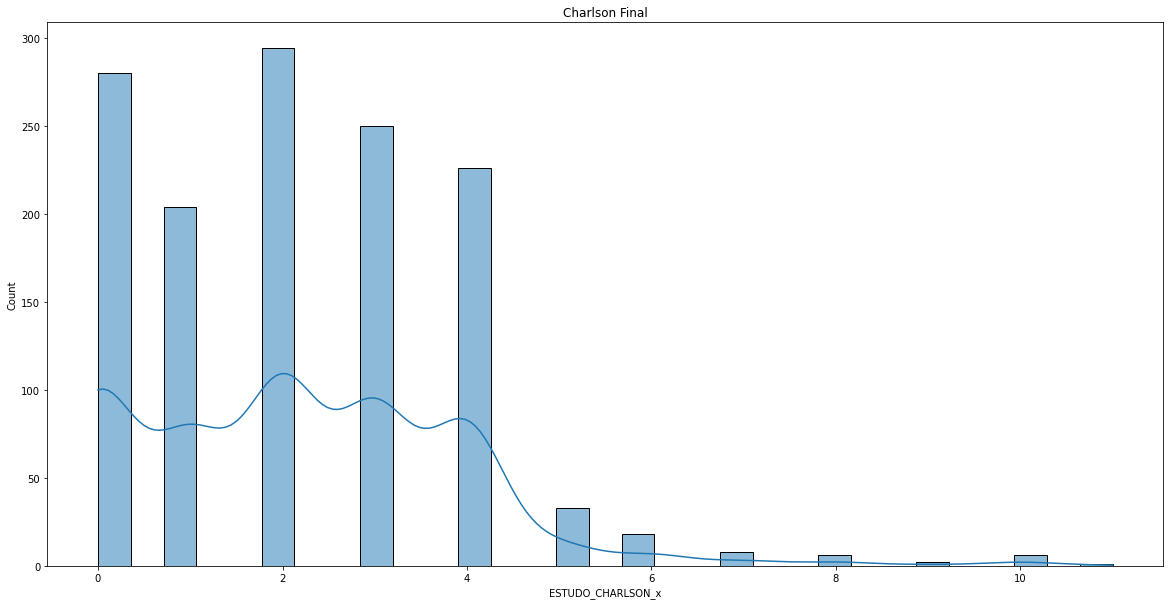

In [158]:
plt.figure(figsize=(20, 10))
sns.histplot(merged['ESTUDO_CHARLSON_x'], kde=True)
plt.title("Charlson Final")
plt.show()

In [159]:
data['ESTUDO_CHARLSON'] = merged['ESTUDO_CHARLSON_x']
resume('ESTUDO_CHARLSON', data)

Valores Faltantes:  0
2.0     294
0.0     280
3.0     250
4.0     226
1.0     204
5.0      33
6.0      18
7.0       8
10.0      6
8.0       6
9.0       2
11.0      1
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [2.0, 5.0, 1.0, 3.0, 6.0, 7.0, 4.0, 8.0, 9.0, 10.0, 0.0, 11.0]


0

#### ESTUDO_FR_DIA_COLETA

In [160]:
data['ESTUDO_FR_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

23      1
NC      1
17      1
20.0    1
26.0    1
13      1
22      1
26      1
18.0    1
Name: ESTUDO_FR_DIA_COLETA, dtype: int64

In [161]:
data = data.drop(['ESTUDO_FR_DIA_COLETA'], axis=1)

#### ESTUDO_FC_DIA_COLETA

In [162]:
data['ESTUDO_FC_DIA_COLETA'] = data['ESTUDO_FC_DIA_COLETA'].fillna('NI')

In [163]:
data['ESTUDO_FC_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI       1319
105.0       1
102.0       1
100.0       1
96.0        1
95.0        1
82.0        1
66.0        1
64.0        1
63.0        1
Name: ESTUDO_FC_DIA_COLETA, dtype: int64

In [164]:
data = data.drop(['ESTUDO_FC_DIA_COLETA'], axis=1)

#### ESTUDO_PA_DIA_COLETA

In [165]:
data['ESTUDO_PA_DIA_COLETA'] = data['ESTUDO_PA_DIA_COLETA'].fillna('NI')

In [166]:
data['ESTUDO_PA_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI        1319
163/72       1
115/65       1
149/77       1
120/60       1
170/90       1
156/30       1
110/80       1
109/74       1
109/64       1
Name: ESTUDO_PA_DIA_COLETA, dtype: int64

In [167]:
data = data.drop(['ESTUDO_PA_DIA_COLETA'], axis=1)

#### ESTUDO_TEMPERATURA_DIA_COLETA

In [168]:
data['ESTUDO_TEMPERATURA_DIA_COLETA'] = data['ESTUDO_TEMPERATURA_DIA_COLETA'].fillna('NI')

In [169]:
data['ESTUDO_TEMPERATURA_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI      1320
36,4       2
36.0       1
36,8       1
37,9       1
37,3       1
36,3       1
36,9       1
Name: ESTUDO_TEMPERATURA_DIA_COLETA, dtype: int64

In [170]:
data = data.drop(['ESTUDO_TEMPERATURA_DIA_COLETA'], axis=1)

#### ESTUDO_SATURACAO_DIA_COLETA

In [171]:
data['ESTUDO_SATURACAO_DIA_COLETA'] = data['ESTUDO_SATURACAO_DIA_COLETA'].fillna('NI')

In [172]:
data['ESTUDO_SATURACAO_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI        1320
95           2
92.0         1
95.0         1
97.0         1
93           1
91           1
76-88%       1
Name: ESTUDO_SATURACAO_DIA_COLETA, dtype: int64

In [173]:
data = data.drop(['ESTUDO_SATURACAO_DIA_COLETA'], axis=1)

#### ESTUDO_APACHE2

In [174]:
data['ESTUDO_APACHE2'] = data['ESTUDO_APACHE2'].fillna('NI')

In [175]:
data['ESTUDO_APACHE2'].value_counts() #DROP

NI    1328
Name: ESTUDO_APACHE2, dtype: int64

In [176]:
data = data.drop(['ESTUDO_APACHE2'], axis=1)

#### ESTUDO_RISCO

In [177]:
data['ESTUDO_RISCO'].value_counts() #DROP SEM INFO NO DICIONARIO

Series([], Name: ESTUDO_RISCO, dtype: int64)

In [178]:
data = data.drop(['ESTUDO_RISCO'], axis=1)

#### ESTUDO_TRATAMENTO

In [179]:
data['ESTUDO_TRATAMENTO'].value_counts() #DROP SEM INFO NO DICIONARIO

D    4
N    2
Name: ESTUDO_TRATAMENTO, dtype: int64

In [180]:
data = data.drop(['ESTUDO_TRATAMENTO'], axis=1)

#### ESTUDO_COMORB_PREV_TX_ORG_SOL

In [181]:
data['ESTUDO_COMORB_PREV_TX_ORG_SOL'].value_counts() #DROP SEM INFO NO DICIONARIO

N    1315
S       8
Name: ESTUDO_COMORB_PREV_TX_ORG_SOL, dtype: int64

In [182]:
data = data.drop(['ESTUDO_COMORB_PREV_TX_ORG_SOL'], axis=1)

#### ESTUDO_CONDUTA

In [183]:
data['ESTUDO_CONDUTA'].value_counts() #DROP SEM INFO NO DICIONARIO

L    1322
Name: ESTUDO_CONDUTA, dtype: int64

In [184]:
data = data.drop(['ESTUDO_CONDUTA'], axis=1)

#### ESTUDO_LOCAL_CONTAMINACAO

In [185]:
data['ESTUDO_LOCAL_CONTAMINACAO'] = data['ESTUDO_LOCAL_CONTAMINACAO'].fillna('NI')

In [186]:
data['ESTUDO_LOCAL_CONTAMINACAO'].value_counts()

NI                                  1101
EXTERNO                              114
UNIDADE DE INTERNACAO HSL             86
OUTRA INSTITUIÇÃO DE SAÚDE            10
HSL                                    8
DESCONHECIDO                           6
INSTITUIÇÃO DE LONGA PERMANÊNCIA       2
OUTRA INSTITUICAO DE SAUDE             1
Name: ESTUDO_LOCAL_CONTAMINACAO, dtype: int64

In [187]:
keys = data['ESTUDO_LOCAL_CONTAMINACAO'].value_counts().keys().tolist()

In [188]:
dictToReplace = __getDictToReplace(keys)

In [189]:
dictToReplace

{'NI': 1,
 'EXTERNO': 2,
 'UNIDADE DE INTERNACAO HSL': 3,
 'OUTRA INSTITUIÇÃO DE SAÚDE': 4,
 'HSL': 5,
 'DESCONHECIDO': 6,
 'INSTITUIÇÃO DE LONGA PERMANÊNCIA': 7,
 'OUTRA INSTITUICAO DE SAUDE': 8}

In [190]:
data['ESTUDO_LOCAL_CONTAMINACAO'] = data['ESTUDO_LOCAL_CONTAMINACAO'].replace(dictToReplace)

#### ESTUDO_LOCAL_CONTAM_UI

In [191]:
data['ESTUDO_LOCAL_CONTAM_UI'] = data['ESTUDO_LOCAL_CONTAM_UI'].fillna('NI')

In [192]:
data['ESTUDO_LOCAL_CONTAM_UI'].value_counts()

NI      1237
15.0      20
13.0      16
12.0      16
14.0       8
9.0        8
8.0        7
18.0       5
19.0       4
6.0        4
17.0       1
16.0       1
5.0        1
Name: ESTUDO_LOCAL_CONTAM_UI, dtype: int64

In [193]:
data['ESTUDO_LOCAL_CONTAM_UI'] = data['ESTUDO_LOCAL_CONTAM_UI'].replace({'NI': 2})

#### ESTUDO_DT_DESFECHO

In [194]:
data['ESTUDO_DT_DESFECHO'].value_counts() #DROP

17/08/2020    2
22/09/2020    1
15/08/2020    1
20/10/2020    1
26/08/2020    1
23/09/2020    1
01/09/2020    1
18/11/2020    1
Name: ESTUDO_DT_DESFECHO, dtype: int64

In [195]:
data = data.drop(['ESTUDO_DT_DESFECHO'], axis=1)

#### ESTUDO_COMORB_PREV_DESCON

In [196]:
data['ESTUDO_COMORB_PREV_DESCON'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_DESCON, dtype: int64

In [197]:
data = data.drop(['ESTUDO_COMORB_PREV_DESCON'], axis=1)

#### ESTUDO_COMORB_PREV_DVP

In [198]:
data['ESTUDO_COMORB_PREV_DVP'].value_counts() #DROP

N    1320
S       3
Name: ESTUDO_COMORB_PREV_DVP, dtype: int64

In [199]:
data = data.drop(['ESTUDO_COMORB_PREV_DVP'], axis=1)

#### ESTUDO_COMORB_PREV_DEMENCIA

In [200]:
data['ESTUDO_COMORB_PREV_DEMENCIA'] = data['ESTUDO_COMORB_PREV_DEMENCIA'].fillna('NI')

In [201]:
data['ESTUDO_COMORB_PREV_DEMENCIA'].value_counts()

N     1315
S        8
NI       5
Name: ESTUDO_COMORB_PREV_DEMENCIA, dtype: int64

In [202]:
data['ESTUDO_COMORB_PREV_DEMENCIA'] = data['ESTUDO_COMORB_PREV_DEMENCIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DTC

In [203]:
data['ESTUDO_COMORB_PREV_DTC'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_DTC, dtype: int64

In [204]:
data = data.drop(['ESTUDO_COMORB_PREV_DTC'], axis=1)

#### ESTUDO_COMORB_PREV_UP

In [205]:
data['ESTUDO_COMORB_PREV_UP'].value_counts() #DROP SEM INFO NO DICIONARIO

N    1321
S       2
Name: ESTUDO_COMORB_PREV_UP, dtype: int64

In [206]:
data = data.drop(['ESTUDO_COMORB_PREV_UP'], axis=1)

#### ESTUDO_COMORB_PREV_DFL

In [207]:
data['ESTUDO_COMORB_PREV_DFL'].value_counts() #DROP SEM INFO NO DICIONARIO

N    1323
Name: ESTUDO_COMORB_PREV_DFL, dtype: int64

In [208]:
data = data.drop(['ESTUDO_COMORB_PREV_DFL'], axis=1)

#### ESTUDO_COMORB_PREV_DFM

In [209]:
data['ESTUDO_COMORB_PREV_DFM'] = data['ESTUDO_COMORB_PREV_DFM'].fillna('NI')

In [210]:
data['ESTUDO_COMORB_PREV_DFM'].value_counts()

N     1317
S        6
NI       5
Name: ESTUDO_COMORB_PREV_DFM, dtype: int64

In [211]:
data['ESTUDO_COMORB_PREV_DFM'] = data['ESTUDO_COMORB_PREV_DFM'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HEMIPLEGIA

In [212]:
data['ESTUDO_COMORB_PREV_HEMIPLEGIA'].value_counts() #DROP

N    1323
Name: ESTUDO_COMORB_PREV_HEMIPLEGIA, dtype: int64

In [213]:
data = data.drop(['ESTUDO_COMORB_PREV_HEMIPLEGIA'], axis=1)

#### ESTUDO_COMORB_PREV_LEUCEMIA',

In [214]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'] = data['ESTUDO_COMORB_PREV_LEUCEMIA'].fillna('NI')

In [215]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'].value_counts()

N     1322
NI       5
S        1
Name: ESTUDO_COMORB_PREV_LEUCEMIA, dtype: int64

In [216]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'] = data['ESTUDO_COMORB_PREV_LEUCEMIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HIV

In [217]:
data['ESTUDO_COMORB_PREV_HIV'] = data['ESTUDO_COMORB_PREV_HIV'].fillna('NI')

In [218]:
data['ESTUDO_COMORB_PREV_HIV'].value_counts()

N     1320
NI       5
S        3
Name: ESTUDO_COMORB_PREV_HIV, dtype: int64

In [219]:
data['ESTUDO_COMORB_PREV_HIV'] = data['ESTUDO_COMORB_PREV_HIV'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_TUL

In [220]:
data['ESTUDO_COMORB_PREV_TUL'] = data['ESTUDO_COMORB_PREV_TUL'].fillna('NI')

In [221]:
data['ESTUDO_COMORB_PREV_TUL'].value_counts()

N     1303
S       20
NI       5
Name: ESTUDO_COMORB_PREV_TUL, dtype: int64

In [222]:
data['ESTUDO_COMORB_PREV_TUL'] = data['ESTUDO_COMORB_PREV_TUL'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_TUM

In [223]:
data['ESTUDO_COMORB_PREV_TUM'].value_counts() #DROP SEM INFO NO DICIONARIO

N    1317
S       6
Name: ESTUDO_COMORB_PREV_TUM, dtype: int64

In [224]:
data = data.drop(['ESTUDO_COMORB_PREV_TUM'], axis=1)

#### STATUS_COVID.1

In [225]:
data['STATUS_COVID.1'].value_counts() #DROP

CONFIRMADOS    489
NEGATIVOS       26
Name: STATUS_COVID.1, dtype: int64

In [226]:
data = data.drop(['STATUS_COVID.1'], axis=1)

#### CD_ATENDIMENTO.1

In [227]:
data['CD_ATENDIMENTO.1'].value_counts() #DROP

1495039.0    1
1553407.0    1
1422582.0    1
1474701.0    1
1357058.0    1
            ..
1289054.0    1
1415930.0    1
1321725.0    1
1293055.0    1
1290241.0    1
Name: CD_ATENDIMENTO.1, Length: 515, dtype: int64

In [228]:
data = data.drop(['CD_ATENDIMENTO.1'], axis=1)

#### DTHR_UTI_IN

In [229]:
data['DTHR_UTI_IN'].value_counts() #DROP

01/12/2020 15:39:33    1
16/06/2020 18:22:27    1
07/03/2021 14:23:30    1
29/08/2020 18:57:42    1
12/03/2021 15:56:05    1
                      ..
20/06/2020 02:53:45    1
09/10/2020 18:36:18    1
23/12/2020 12:53:51    1
23/09/2020 12:08:10    1
01/12/2020 23:58:43    1
Name: DTHR_UTI_IN, Length: 515, dtype: int64

In [230]:
data = data.drop(['DTHR_UTI_IN'], axis=1)

#### DTHR_UTI_OUT

In [231]:
data['DTHR_UTI_OUT'].value_counts() #DROP

11/08/2020 16:54:22    1
09/10/2020 10:59:15    1
21/02/2021 14:28:45    1
19/11/2020 18:37:41    1
09/06/2020 15:10:38    1
                      ..
30/05/2020 18:07:02    1
02/03/2021 17:56:45    1
19/06/2020 17:53:55    1
02/10/2020 17:34:13    1
27/09/2020 15:45:00    1
Name: DTHR_UTI_OUT, Length: 515, dtype: int64

In [232]:
data = data.drop(['DTHR_UTI_OUT'], axis=1)

## Ver Features

In [237]:
showMissing(data)

COLETOU_AMOSTRA , 0 ,
IFI_OUTRO_VIRUS , 0 ,
CD_PACIENTE , 0 ,
GENERO , 0 ,
IDADE , 0 ,
DIAGNOSTICO_SARS , 0 ,
CD_CID , 0 ,
DS_ESPECIALID_SAI , 0 ,
REINTER_30D , 0 ,
CARATER_ATENDIMENTO , 0 ,
EMERG_SERVICO , 0 ,
EMERG_RISCO , 0 ,
CID_DIAG_ATEND , 0 ,
CID_CAPITULO_DIAG , 0 ,
BLOCO_CENTRAL_ST , 0 ,
HEMODINAMICA_ST , 0 ,
EX_LAB_ST , 0 ,
EX_IMG_ST , 0 ,
EX_OUTROS_ST , 0 ,
TIPO_REGISTRO , 0 ,
SN_CRIT_CONTATO_CASO_COVID , 0 ,
SN_CRIT_SRAG , 0 ,
SN_CRIT_SINDROME_GRIPAL , 0 ,
ESTUDO_TP_EXPOSICAO , 0 ,
ESTUDO_COMORB_PREV_HAS , 0 ,
ESTUDO_COMORB_PREV_IAM , 0 ,
ESTUDO_COMORB_PREV_IC , 0 ,
ESTUDO_COMORB_PREV_DRC , 0 ,
ESTUDO_COMORB_PREV_DMII , 0 ,
ESTUDO_COMORB_PREV_CARCINOMA , 0 ,
ESTUDO_COMORB_PREV_AVC , 0 ,
ESTUDO_COMORB_PREV_ASMA , 0 ,
ESTUDO_COMORB_PREV_DPOC , 0 ,
ESTUDO_COMORB_PREV_OBESIDADE , 0 ,
ESTUDO_COMORB_PREV_EPILEPSIA , 0 ,
ESTUDO_COMORB_PREV_HIGIDO , 0 ,
ESTUDO_COMORB_PREV_OUTRAS , 0 ,
ESTUDO_CHARLSON , 0 ,
ESTUDO_LOCAL_CONTAMINACAO , 0 ,
ESTUDO_LOCAL_CONTAM_UI , 0 ,
ESTUDO_COMORB_PR

## Checando dados faltantes

In [238]:
columns = data.columns.tolist()

In [239]:
for c in columns:
    _aux = data[c].isnull().tolist()
    _aux = [str(v) for v in _aux]
    if 'True' in _aux:
        print(c)
    _aux = []

## Mapa de Calor - Pearson

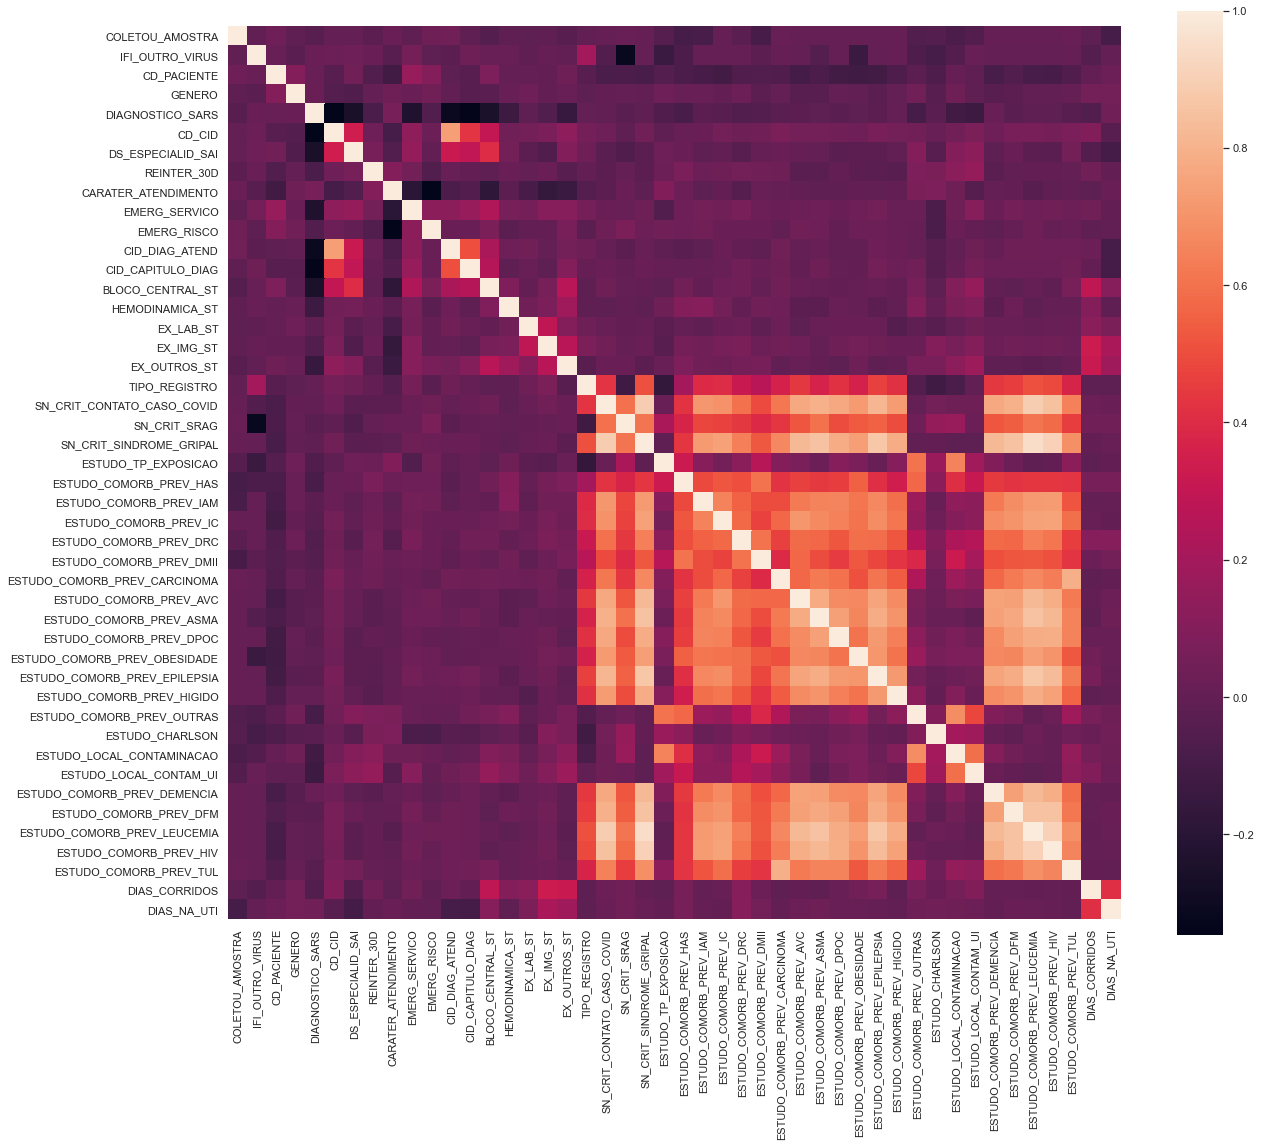

In [236]:
sns.set(rc={'figure.figsize':(20, 17)})
corr_matrix = data.corr(method='pearson')
plt.subplots(figsize=(20,17))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('heatmap.png')
plt.show()